# Zillow Prize: Zillow’s Home Value Prediction (Zestimate)
## Can you improve the algorithm that changed the world of real estate?

## Description
Zillow's "Zestimates" are estimated home values based on numerous categorical and numerical features of a given property. Zillow has been able to improve the median margin of error from 14% at the Zestimate's release to 5% as of 2017. However, they have introduced a competition to Data Scientists to further improve the accuracy of the Zestimate. The goal of this project is to produce a model that more accurately predicts the future sale prices of homes than the current Zestimate algorithm. Success is measured by minimizing the log-error between the Zestimate and the actual sale price of the property. The log-error is defined as:
  
           logerror = log(Zestimate) - log(SalePrice)

We have been provided data on a variety of different features of Los Angeles-area homes sold in the year 2016. Some of these features are numerical and some are categorical. We will be using this data to build our model.

## Exploratory Data Analysis

> ### Import Libraries

In [36]:
import numpy as np 
import os
import pandas as pd

# plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# reduce warnings
import warnings
warnings.filterwarnings('ignore')

# metrics et al.
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as st
from scipy.spatial.distance import cdist
from sklearn import ensemble, tree, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

# KMeans
from sklearn.cluster import KMeans

# OLS based models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

# Support vector machine 
from sklearn.svm import SVR

# Various Tree Based Regressors
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Grid Search
from sklearn.model_selection import GridSearchCV

# np.random.seed(37)

> ### Load and Examine the Data

In [50]:
# read in training and test data and labels
train_data = pd.read_csv('input/properties_2016.csv')
train_labels = pd.read_csv('input/train_2016_v2.csv')
test_data = pd.read_csv('input/properties_2017.csv')
test_labels = pd.read_csv('input/train_2017.csv')

# train_data = pd.read_csv('../input/properties_2016.csv')
# train_labels = pd.read_csv('../input/train_2016_v2.csv')
# test_data = pd.read_csv('../input/properties_2017.csv')
# test_labels = pd.read_csv('../input/train_2017.csv')

The first step in our exploratory data analysis is to get a basic understanding of our dataset through a quick summary of what it contains.

In [3]:
train_data.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.985217e+06,811519.000000,6061.000000,1628.000000,2.973755e+06,2.973767e+06,12629.000000,1.938488e+06,2.856305e+06,17096.0,...,2647.000000,2.925289e+06,682069.000000,2.930235e+06,2.942667e+06,2.973778e+06,2.917484e+06,2.953967e+06,56464.000000,2.910091e+06
mean,1.332586e+07,1.931166,7.202607,646.883292,2.209143e+00,3.088949e+00,3.725948,5.784787e+00,2.299263e+00,66.0,...,278.296562,1.964262e+03,1.401464,1.708836e+05,4.204790e+05,2.014999e+03,2.524780e+05,5.377607e+03,13.892409,6.048431e+13
std,7.909966e+06,3.148587,2.436290,538.793473,1.077754e+00,1.275859e+00,0.501700,1.805352e+00,1.000736e+00,0.0,...,369.731508,2.344132e+01,0.539076,4.020683e+05,7.263467e+05,3.683161e-02,4.450132e+05,9.183107e+03,2.581006,3.249035e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,...,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,1.340000e+00,0.000000,-1.000000e+00
25%,1.164371e+07,1.000000,7.000000,272.000000,2.000000e+00,2.000000e+00,3.000000,4.000000e+00,2.000000e+00,66.0,...,96.000000,1.950000e+03,1.000000,7.480000e+04,1.796750e+05,2.015000e+03,7.483600e+04,2.461070e+03,14.000000,6.037400e+13
50%,1.254509e+07,1.000000,7.000000,534.000000,2.000000e+00,3.000000e+00,4.000000,7.000000e+00,2.000000e+00,66.0,...,168.000000,1.963000e+03,1.000000,1.225900e+05,3.060860e+05,2.015000e+03,1.670420e+05,3.991780e+03,14.000000,6.037572e+13
75%,1.409712e+07,1.000000,7.000000,847.250000,3.000000e+00,4.000000e+00,4.000000,7.000000e+00,3.000000e+00,66.0,...,320.000000,1.981000e+03,2.000000,1.968890e+05,4.880000e+05,2.015000e+03,3.069180e+05,6.201005e+03,15.000000,6.059042e+13
max,1.696019e+08,13.000000,27.000000,8516.000000,2.000000e+01,2.000000e+01,5.000000,1.200000e+01,2.000000e+01,66.0,...,6141.000000,2.015000e+03,41.000000,2.514860e+08,2.827860e+08,2.016000e+03,9.024622e+07,3.458861e+06,99.000000,4.830301e+14


This summary shows that there are 53 different variables provided in our dataset. The first thing that stands out is the first row of the table returned by the describe() function - *count*. This refers to the number of values in the dataset for that respective column. There are just under 3 million parcelid's, which uniquely identify properties (our observations). However, most of the features of our properties do not have a similar number for *count*. This means that we are missing data for many different features for many different observations. We will take a closer examination of the missing data later on.

The second thing that stands out is that there are numeric values representing categorical features. For example, the column *decktypeid* represents the type of deck of a property. The number assigned to the type of deck does not measure magnitude and could have been arbitrary. 

Finally, we should note that the mean of the majority of the truly numeric (and not representing categorical) features is greater than the median. This means that our features have a positive skew.

Now that we have some general context to our dataset, we can look at the data itself.

In [4]:
train_labels.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


The training labels dataset consists of three different columns. *parcelids* identifies individual homes. *logerror* is the difference between the log of Zillow's estimated selling price and the log of the home's actual selling price. And *transactiondate* is the date the home sold.

In [5]:
train_data.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


> ### Examine Missing Data

By looking at some example observations of our training data, we can confirm that lots of observations lack complete data. We can further understand the extent of these missing values through a visualization.

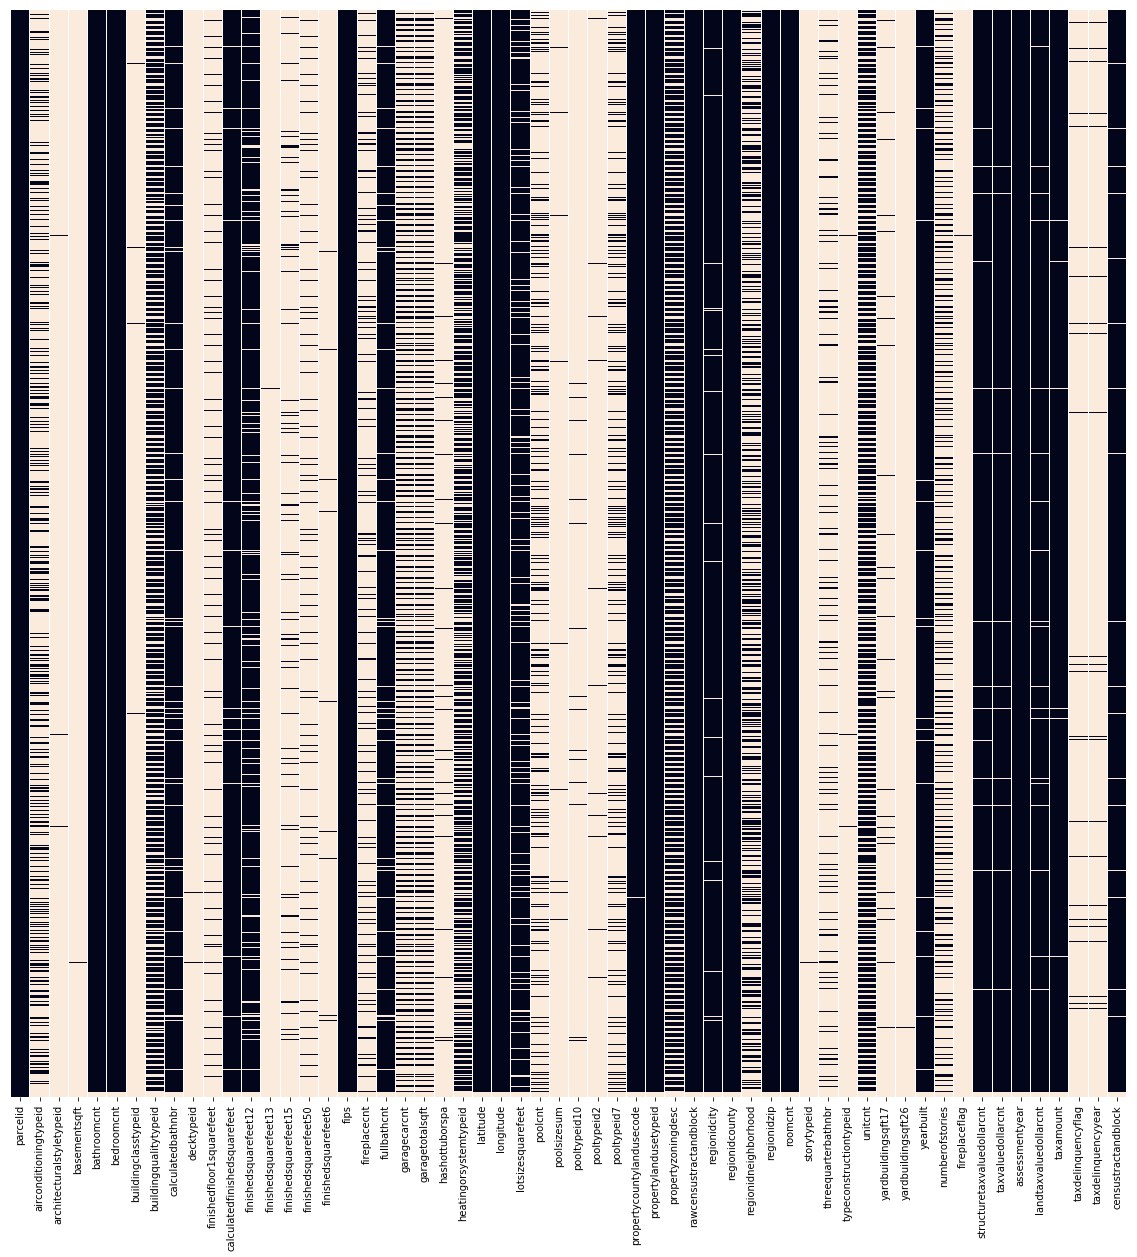

In [6]:
plt.figure(figsize=(20,20))

sns.heatmap(
    train_data.isnull(),
    cbar=False,
    yticklabels=False
)

This heatmap visualizes whether the training data has missing values. The light pink sections of the chart indicate missing data. This confirms our impression that there is missing data for many of the features. To further understand the extent of missing data, we can calculate the percentage of missing observations by feature.

In [7]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = round((train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False), 4)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name = 'Feature'

missing_data

,Total Missing Count,% of Total Observations
Feature,,
storytypeid,2983593,0.9995
basementsqft,2983589,0.9995
yardbuildingsqft26,2982570,0.9991
fireplaceflag,2980054,0.9983
architecturalstyletypeid,2979156,0.9980
typeconstructiontypeid,2978470,0.9977
finishedsquarefeet13,2977545,0.9974
buildingclasstypeid,2972588,0.9958
decktypeid,2968121,0.9943


We are missing data for almost all observations for seventeen features. This is unfortunate because some of these variables contain information about potentially impactful features of the value of properties, such as the architecture style, and the size of the basement and pool.

> ### Correlations Between Dependent and Independent Variables

The next step of our Exploratory Data Analysis is to find correlations between our dependent and independent variables. This will help us identify instances of potential multicollinearity within our independent variables. It will also help us identify features that change with logerror.

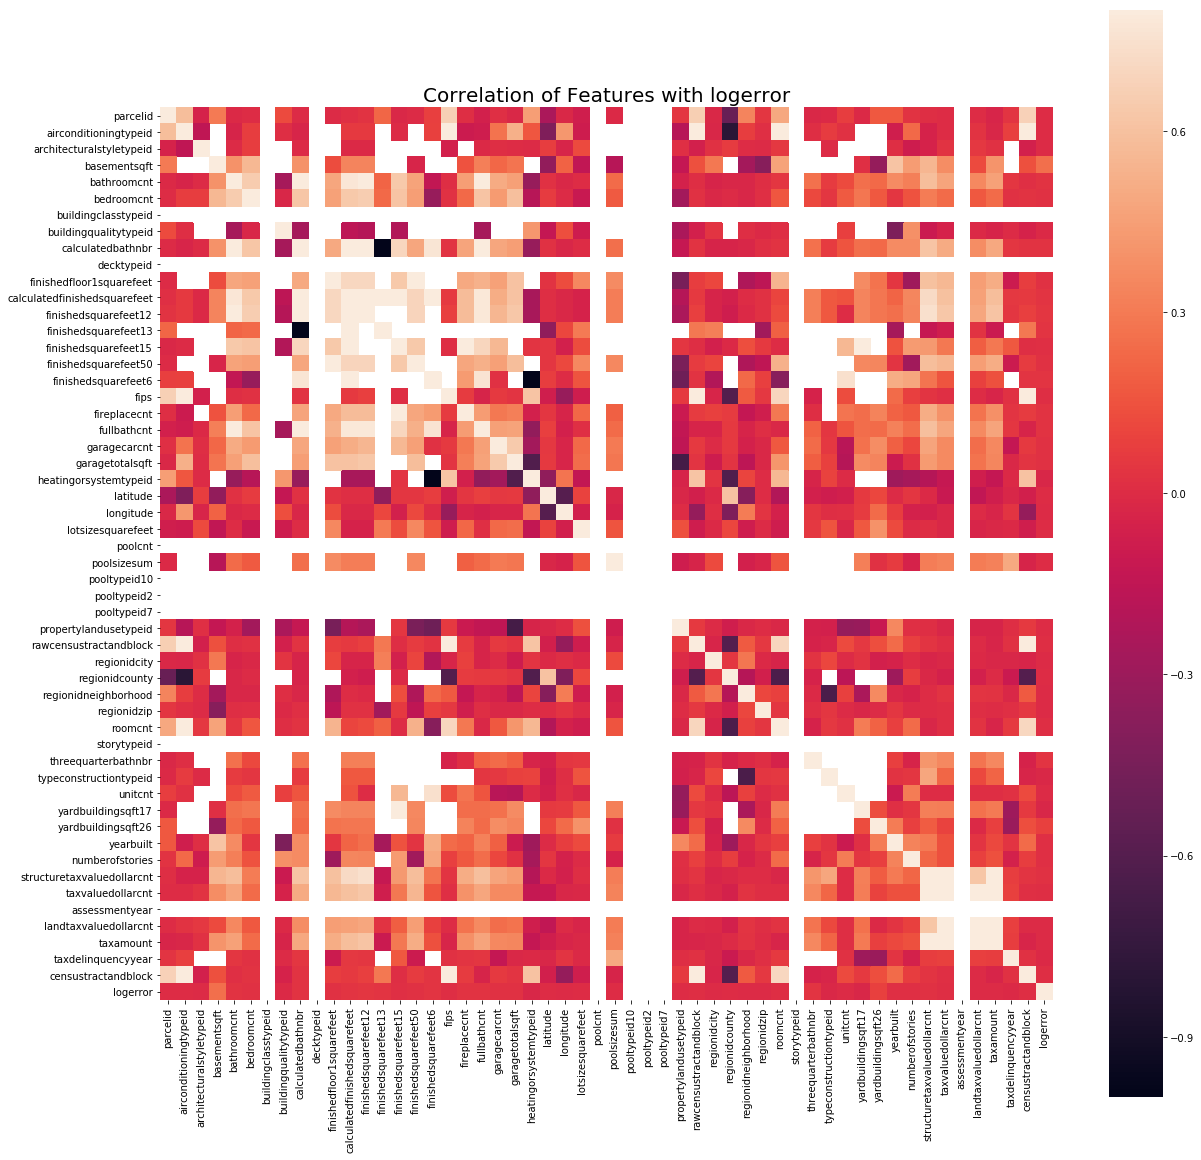

In [8]:
train_data_labels = pd.merge(train_data, train_labels, on='parcelid')

correlation = train_data_labels.corr()

plt.figure(figsize=(20,20))
plt.title('Correlation of Features with logerror',y=1,size=20)

sns.heatmap(
    correlation,
    square=True,
    vmax=0.8
)

Lighter squares on this heat map indicate that the variables are correlated. There are five squares that stick out. The first is between *calculatedfinishedsquarefeet* and *finishedsquarefeet12*. Both of these variables actually capture the same features of a home - the finished living area. 

Other lighter squares are *structuretaxvaluedollarcnt*, which measures the value of the structures on the property, *taxvaluedollarcnt*, which measures the value of the property, *landtaxvaluedollarcnt*, which measures the value of the land on the proeprty, and *taxamount*, which is the total tax assessed. 

Finally, we can visualize how a sample of these variables are correlated with *logerror* through pair plots. We are choosing to visualize features that are present for more than 90% of observations and are not some sort of numeric identifier. For example, although most properties contain *censustractandblock*, we are not including it in this visualization because it is census ID. This 90% cutoff is being used for this visualization but will not necessarily be adhered to for our model-building.

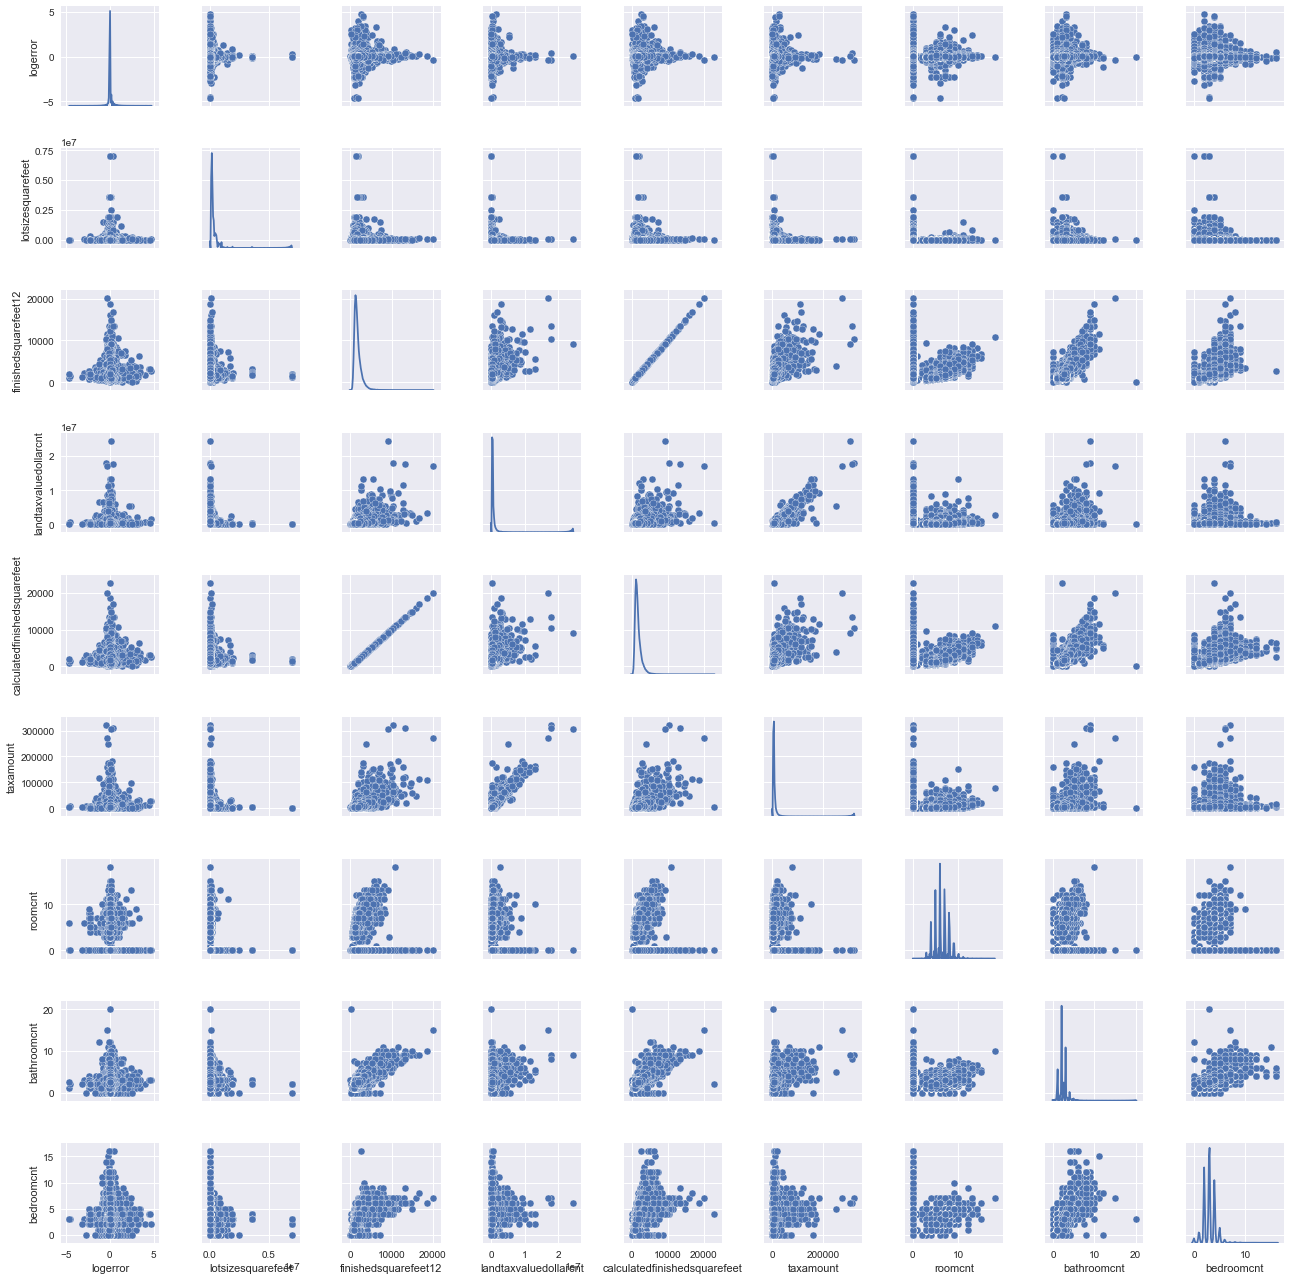

In [9]:
sns.set()

columns = [
    'logerror', 'lotsizesquarefeet', 'finishedsquarefeet12','landtaxvaluedollarcnt', 
    'calculatedfinishedsquarefeet', 'taxamount', 'roomcnt', 'bathroomcnt', 'bedroomcnt'
]

sns.pairplot(
    train_data_labels[columns], 
    size=2, 
    kind ='scatter', 
    diag_kind='kde'
)

## Preprocessing and Feature Engineering

As shown before, our dataset has several features that have a high percentage of missing values. To create our model, it will be considered only features that have less than 10% missing values. Exceptions to this rule were applied when based on descriptions of the data dictionary and filled values:

- _poolcnt_: the data dictionary provided by Kaggle mentions that this feature related to the number of pools on the lot (if any). This feature will also be combined with other pool related features to create derived variable that indicates the presence of a pool. Missing values will be filled with zeros (absence of a pool).

- _taxdelinquencyflag_: the data dictionary mentions "Property taxes for this parcel are past due as of 2015" and there are only 'Y' values filled. Missing values will be filled with zeros ('N' not delinquent).

- _taxdelinquencyyear_: the data dictionary mentions "year for which the unpaid property taxes were due" and only 'Y'. The feature will be transformed to the total number of years of delinquency. Missing values will be filled with zeros (not delinquent).

- _buildingqualitytypeid_: the data dictionary mentions "overall assessment of condition of the building from best (lowest) to worst (highest)" and, although this feature has 35% of NAs, its an important feature and missing values will be filled with mean values.

- _heatingorsystemtypeid_: the data dictionary mentions "type of home heating system" and 39% of values are missing. An "other" value will be considered for this feature as 95% of households in US have a heating system (According to the 2015 report from U.S. Energy Information Administration)

The mean value assignments for missing values will be done later on based on a clustering strategy, i.e., the mean value considered will be the one of the cluster that the observation belongs to.

In [10]:
# pool treatment
train_data['has_pool'] = ((train_data.poolcnt > 0) | (train_data.poolsizesum > 0) | (train_data.pooltypeid10 == 1) | 
                          (train_data.pooltypeid2 == 1) | (train_data.pooltypeid7 == 1)).astype(int)

# tax delinquency treatment
train_data['is_delinquent'] = (train_data.taxdelinquencyflag == 'Y').astype(int)
def conditions(x): 
    v = 0
    if np.isnan(x): 
        return 0
    if x > 15:
        return int(2016 - (x + 1900))
    else:
        return int(2016 - (x + 2000))
train_data['years_of_delinquency'] = train_data['taxdelinquencyyear'].apply(conditions)

### features with less 10% NAs

# characteristics of property
cols_property_characteristics = [
    'roomcnt', 
    'bedroomcnt',
    'bathroomcnt',
    'fullbathcnt',
    'calculatedbathnbr',
    'calculatedfinishedsquarefeet',
    'finishedsquarefeet12',
    'lotsizesquarefeet',
    'yearbuilt',
    'assessmentyear',
    'has_pool'] 

# tax information about property (proxy for value)
cols_tax_info = ['taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt',
                 'landtaxvaluedollarcnt', 'is_delinquent', 'years_of_delinquency']

# use of property (categorical)
cols_property_use = ['propertylandusetypeid', 'propertycountylandusecode']

# locality (categorical)
cols_locality = ['regionidcounty', 'regionidcity', 'regionidzip'] 
# other locality (no NAs but possibly redundants with locality) 
# cols_other_locality = ['censustractandblock', 'rawcensustractandblock', 'fips', 'longitude', 'latitude']

# sets a value for NAs
train_data[cols_property_use + cols_locality] = train_data[cols_property_use + cols_locality].fillna('unknown')

# drop NA values
selected_features = cols_locality + cols_property_characteristics + cols_property_use + cols_tax_info
train_data_no_NAs = train_data[selected_features].dropna()

print("Original dataset:", train_data.shape)
print("Dataset without NAs:", train_data_no_NAs.shape)


Original dataset: (2985217, 61)
Dataset without NAs: (2471866, 22)


A data standardization is applied to selected features to prepare them for clustering. Leaving variances unequal will lead the KMeans algorithm to put more weight on variables with smaller variance. The features selected for clustering are related to property characteristics and value (proxied by tax value). Categorical variables were dropped from the analysis due to potential inconsistencies that these variables could cause (Euclidean distances usually do not make sense for categorical data). Besides filling NAs values, the clusters will also be used as new features for the modeling step as they could encode non-linarities that the linear regression would not identify. The clusters will also be useful to analize the centroid values and understand the housing market.

In [11]:
# standardizes features
df_to_scale = train_data_no_NAs[cols_property_characteristics + cols_tax_info]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_to_scale.values)
scaled_data = pd.DataFrame(scaled_data, columns=df_to_scale.columns, index=df_to_scale.index)
scaled_data.shape

(2471866, 17)

In [12]:
scaled_data[sorted(scaled_data.columns)].head()

,assessmentyear,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,has_pool,is_delinquent,landtaxvaluedollarcnt,lotsizesquarefeet,roomcnt,structuretaxvaluedollarcnt,taxamount,taxvaluedollarcnt,yearbuilt,years_of_delinquency
19,0.013965,-0.265645,0.849178,-0.265645,1.975173,1.975173,-0.217931,-0.528171,-0.138787,-0.431095,-0.039156,-0.550276,0.217226,0.212648,-0.223833,1.856462,-0.109312
28,0.013965,-0.265645,-1.213353,-0.265645,-0.756667,-0.756667,-0.217931,-0.528171,-0.138787,-0.311744,0.047424,-0.550276,0.263714,0.104649,-0.121111,1.811312,-0.109312
31,0.013965,-0.265645,-0.182087,-0.265645,0.303627,0.303627,-0.217931,-0.528171,-0.138787,0.424401,-0.048650,-0.550276,0.163910,0.349492,0.364739,-1.710409,-0.109312
94,0.013965,0.782904,-3.275883,0.782904,8.700033,8.700033,0.848316,-0.528171,-0.138787,0.644611,-0.012839,-0.550276,4.571127,2.271983,2.205924,1.811312,-0.109312
101,0.013965,0.782904,-0.182087,0.782904,0.399236,0.399236,0.848316,-0.528171,-0.138787,0.103282,-0.004300,-0.550276,0.859936,0.301609,0.402185,1.856462,-0.109312


To identify the optimal K, the Elbow method is used. The Kmeans clustering is executed multiple times with different values of k and with a smaller number of observations, which were sampled from original dataset. This choice was made due to performance issues. The result is show in the plot below.

In [13]:
# run clustering with less data to find optimal k
clustering_data = scaled_data.sample(n=50000)

distortions = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', n_jobs=-1).fit(clustering_data)
    distortions.append(sum(np.min(cdist(clustering_data, km.cluster_centers_, 'euclidean'), axis=1)) / clustering_data.shape[0])

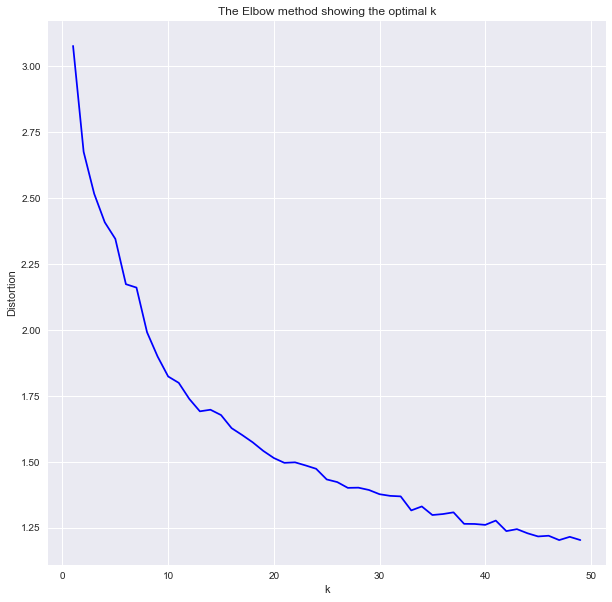

In [14]:
# Plot the elbow
plt.figure(figsize=(10,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow method showing the optimal k')
plt.show()

By analysing the plot, it can be seems that the elbow is achieved when k is 13. The algorithm is executed once more with all data and the optimal k.

In [15]:
# Runs the clustering with k=13 based on elbow analysis
optimal_k = 13
km = KMeans(n_clusters=optimal_k, init='k-means++', n_jobs=-1).fit(scaled_data)

In [16]:
# scale back and presents typical values for each cluster
centroids = scaler.inverse_transform(km.cluster_centers_)
centroids = pd.DataFrame(centroids, columns=scaled_data.columns)
centroids.round(0)

,roomcnt,bedroomcnt,bathroomcnt,fullbathcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,lotsizesquarefeet,yearbuilt,assessmentyear,has_pool,taxamount,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,is_delinquent,years_of_delinquency
0,0.0,3.0,2.0,2.0,2.0,1477.0,1477.0,22221.0,1959.0,2015.0,-0.0,3993.0,296881.0,115413.0,181469.0,-0.0,-0.0
1,1.0,5.0,5.0,4.0,5.0,4063.0,4063.0,22797.0,1982.0,2015.0,1.0,16699.0,1367800.0,593446.0,774353.0,0.0,0.0
2,1.0,3.0,2.0,2.0,2.0,1569.0,1569.0,27289.0,1958.0,2015.0,0.0,4739.0,331232.0,130982.0,200250.0,1.0,2.0
3,1.0,5.0,6.0,6.0,6.0,6284.0,6284.0,37333.0,1981.0,2015.0,1.0,52201.0,4318167.0,1547410.0,2770757.0,0.0,0.0
4,7.0,3.0,2.0,2.0,2.0,1756.0,1756.0,7303.0,1969.0,2015.0,0.0,4086.0,341269.0,125615.0,215653.0,-0.0,-0.0
5,2.0,4.0,4.0,4.0,4.0,3341.0,3341.0,302087147.0,1997.0,2015.0,0.0,13372.0,1146460.0,528517.0,617943.0,0.0,0.0
6,1.0,3.0,2.0,2.0,2.0,2183.0,2183.0,26197.0,1956.0,2014.0,-0.0,10663.0,870863.0,299604.0,571259.0,-0.0,0.0
7,3.0,4.0,3.0,3.0,3.0,2611.0,2611.0,21119.0,1972.0,2015.0,1.0,7156.0,579410.0,254237.0,325173.0,-0.0,0.0
8,1.0,6.0,8.0,8.0,8.0,10648.0,10648.0,64215.0,1982.0,2015.0,1.0,187899.0,15357571.0,4826079.0,10531492.0,0.0,0.0
9,0.0,4.0,3.0,3.0,3.0,2226.0,2226.0,26789.0,1981.0,2015.0,0.0,6354.0,487887.0,226319.0,261567.0,-0.0,-0.0


An iterative EM-type algorithm will be used to fill NAs based on the following steps:

1) Initialize missing values to their column means

2) Repeat until convergence:

Perform K-means clustering on the filled-in data

Set the missing values to the centroid coordinates of the clusters to which they were assigned

By this method we will achieve aproximate mean values for missing data. The mean value for each row/feature will not be the mean value for the entire dataset then, but the mean value of its corresponding cluster.

In [17]:
def kmeans_missing(X, n_clusters, max_iter=20):
    """Perform K-Means clustering on data with missing values.

    Args:
      X: An [n_samples, n_features] array of data to cluster.
      n_clusters: Number of clusters to form.
      initial_centroids
      max_iter: Maximum number of EM iterations to perform.

    Returns:
      labels: An [n_samples] vector of integer labels.
      centroids: An [n_clusters, n_features] array of cluster centroids.
      X_hat: Copy of X with the missing values filled in.
    """

    # Initialize missing values to their column means
    missing = ~np.isfinite(X)
    mu = np.nanmean(X, 0, keepdims=1)
    X_hat = np.where(missing, mu, X)
    
    # Standardizes features
    scaler = StandardScaler()
    X_hat = scaler.fit_transform(X_hat)
    
    for i in range(max_iter):
        
        if (i % 10) == 0:
            print("Iteration:", i)
        
        if i > 0:
            # initialize KMeans with the previous set of centroids. 
            cls = KMeans(n_clusters, init=prev_centroids, n_jobs=-1)
        else:
            cls = KMeans(n_clusters, n_jobs=-1)

        # perform clustering on the filled-in data
        predicted_labels = cls.fit_predict(X_hat)
        predicted_centroids = cls.cluster_centers_

        # fill in the missing values based on their cluster centroids
        X_hat[missing] = predicted_centroids[predicted_labels][missing]

        # when the labels have stopped changing then we have converged
        if i > 0 and np.all(predicted_labels == prev_labels):
            print("Clusters converged after", i, "iterations")
            break

        prev_labels = predicted_labels
        prev_centroids = predicted_centroids 

    # Scale back values
    new_centroids = pd.DataFrame(scaler.inverse_transform(predicted_centroids), columns=X.columns)
    X_hat = pd.DataFrame(scaler.inverse_transform(X_hat), columns=X.columns, index=X.index)
    
    return predicted_labels, new_centroids, X_hat, missing, cls, scaler

# obtain dataset with NAs filled based on clusters means
labels, new_centroids, train_data_no_NA, missing, cls, scaler = kmeans_missing(
    train_data[cols_property_characteristics + cols_tax_info], optimal_k)

Iteration: 0
Iteration: 10
Clusters converged after 16 iterations


The table below shows the new clusters obtained after several iterations.

In [18]:
new_centroids.round(0)

,roomcnt,bedroomcnt,bathroomcnt,fullbathcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,lotsizesquarefeet,yearbuilt,assessmentyear,has_pool,taxamount,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,is_delinquent,years_of_delinquency
0,1.0,2.0,1.0,1.0,1.0,1163.0,1037.0,19715.0,1949.0,2015.0,0.0,3198.0,239657.0,79081.0,169360.0,0.0,-0.0
1,1.0,5.0,5.0,5.0,5.0,4501.0,4427.0,23918.0,1980.0,2015.0,1.0,19573.0,1601439.0,675262.0,927324.0,0.0,0.0
2,7.0,3.0,2.0,2.0,2.0,1729.0,1730.0,7397.0,1970.0,2015.0,0.0,4161.0,347901.0,129417.0,218508.0,0.0,-0.0
3,2.0,3.0,2.0,2.0,2.0,1963.0,1961.0,40187.0,1969.0,2015.0,1.0,5520.0,438549.0,186990.0,251615.0,0.0,-0.0
4,1.0,1.0,1.0,10.0,10.0,243052.0,72723.0,171681.0,1987.0,2015.0,0.0,948392.0,69720657.0,50233633.0,19487024.0,0.0,0.0
5,0.0,4.0,3.0,3.0,3.0,2347.0,2285.0,23416.0,1975.0,2015.0,0.0,6464.0,491502.0,226875.0,264924.0,0.0,-0.0
6,0.0,3.0,2.0,2.0,2.0,1496.0,1473.0,21238.0,1960.0,2015.0,-0.0,4122.0,308534.0,120658.0,188006.0,0.0,0.0
7,2.0,4.0,4.0,4.0,4.0,3341.0,3341.0,302087147.0,1997.0,2015.0,0.0,13372.0,1146460.0,528517.0,617943.0,0.0,0.0
8,1.0,4.0,6.0,7.0,7.0,12691.0,8747.0,54148.0,1979.0,2015.0,1.0,118881.0,9732101.0,3400185.0,6374290.0,0.0,0.0
9,1.0,3.0,2.0,2.0,2.0,1673.0,1572.0,26151.0,1957.0,2015.0,0.0,4931.0,344326.0,137197.0,207937.0,1.0,2.0


The obtained clusters are added as a new feature to the dataset, all numerical types are converted to integers and all categorical type are converted to panda's category data type.

In [19]:
# adding clusters as a variable
train_data_no_NA['cluster'] = labels

# converting data types and joining categorical and non catgorical data in the final dataset
prepared_data = pd.concat(
    [train_data_no_NA.round(0).astype('int64'), train_data[cols_locality + cols_property_use]], 
    axis=1, 
    sort=False)
cols = cols_locality + cols_property_use + ['cluster', 'is_delinquent', 'has_pool']
prepared_data[cols] = prepared_data[cols].astype('category')

print(prepared_data.shape)
print(prepared_data.dtypes)

(2985217, 23)
roomcnt                            int64
bedroomcnt                         int64
bathroomcnt                        int64
fullbathcnt                        int64
calculatedbathnbr                  int64
calculatedfinishedsquarefeet       int64
finishedsquarefeet12               int64
lotsizesquarefeet                  int64
yearbuilt                          int64
assessmentyear                     int64
has_pool                        category
taxamount                          int64
taxvaluedollarcnt                  int64
structuretaxvaluedollarcnt         int64
landtaxvaluedollarcnt              int64
is_delinquent                   category
years_of_delinquency               int64
cluster                         category
regionidcounty                  category
regionidcity                    category
regionidzip                     category
propertylandusetypeid           category
propertycountylandusecode       category
dtype: object


In [20]:
pd.set_option('display.max_columns', 25)
prepared_data[sorted(prepared_data.columns)].head()

,assessmentyear,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,cluster,finishedsquarefeet12,fullbathcnt,has_pool,is_delinquent,landtaxvaluedollarcnt,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxamount,taxvaluedollarcnt,yearbuilt,years_of_delinquency
0,2015,0,0,1,1163,0,1037,1,0,0,9,85768,010D,269,37688,3101,96337,0,79081,3198,9,1949,0
1,2015,0,0,1,1163,0,1037,1,0,0,27516,4083,0109,261,37688,3101,96337,0,79081,3198,27516,1949,0
2,2015,0,0,5,73026,1,4427,5,0,0,762631,63085,1200,47,51617,3101,96095,0,650756,20800,1413387,1980,0
3,2015,0,0,1,5068,0,1037,1,0,0,585488,7521,1200,47,12447,3101,96424,0,571346,14558,1156834,1948,0
4,2015,0,0,1,1776,0,1037,1,0,0,239695,8512,1210,31,12447,3101,96450,0,193796,5725,433491,1947,0


The prepared dataset, the kmeans model and the scaler model are then persisted.

In [21]:
# persists the prepared dataset
prepared_data.to_pickle('./prepared_data.pkl')

# load the persisted dataset 
# prepared_data = pd.read_pickle("./prepared_data.pkl")

# persists the kmeans model
joblib.dump(cls, './kmeans_model.joblib') 

# load the kmeans  model
# cls = joblib.load('kmeans_model.joblib') 

# persists the scaler
joblib.dump(scaler, './scaler.joblib') 

# load the scaler
# scaler = joblib.load('scaler.joblib')

['./scaler.joblib']

   # Using Grid Search to Identify Optimal Parameters

In [52]:
# Training and test data sets config copied from Josh

# transforming data type in place
for c, dtype in zip(train_data.columns, train_data.dtypes):
    if dtype == np.float64:
        train_data[c] = train_data[c].astype(np.float32)

# one hot encoding categorical variables
#to be completed: the hashottub and fireplaceflag are ripe for this type of encoding

    
# First we are going to make sure the training data only has attributes for the training labels
train_df = train_data.merge(train_labels, how = 'inner', left_on = 'parcelid', right_on = 'parcelid')
print(train_df.shape)
y = train_df['logerror']

# creating train and validation sets
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2)

# remove unnecessary columns from train_df
X_train = X_train.drop(['parcelid', 'logerror','transactiondate', 'propertyzoningdesc',
                  'taxdelinquencyflag', 'propertycountylandusecode','hashottuborspa','fireplaceflag'], axis=1)
X_test = X_test.drop(['parcelid', 'logerror','transactiondate', 'propertyzoningdesc',
                  'taxdelinquencyflag', 'propertycountylandusecode','hashottuborspa', 'fireplaceflag'], axis=1)

# filling in missing values with a zero...stop gap solution
X_train.fillna(0, inplace= True)
X_test.fillna(0, inplace= True)

(90275, 60)


In [ ]:
#########################
#########################
# GRID SEARCH OPTIMIZER #
#########################
#########################

# a function to use grid search to find the optimal parameters for a given model
def grid_search_optimizer(model_dict, train_data, train_labels):
    '''
    Arguments
    
    model_dict: a dictionary of different model params to run grid search over
    train_data: the training data used to fit the model
    train_labels: the training labels for the training data set
    '''
    
    # iterate through different models and perform grid search over them
    for model_name, params in model_dict.items():
        model_object = params['model_object']
        model_params = params['model_params']
    
        # instantiate and fit GridSearchCV
        grid_search = GridSearchCV(estimator=model_object, param_grid=model_params)
        grid_search.fit(train_data, train_labels)

        # print the model's best score and params
        print("Grid Search best score for {name}: {score}".format(name=model_name, score=grid_search.best_score_))
        print("Grid Search best params for {name}: {params}".format(name=model_name, params=grid_search.best_params_))
        print('\n')

    
# Instantiate a model dictionary. Add all relevant model information to this dictionary
model_dict = {}

# Add random forest regressor to model dict
model_dict['random_forest_regressor'] = {}
model_dict['random_forest_regressor']['model_object'] = RandomForestRegressor()
model_dict['random_forest_regressor']['model_params'] = {'n_estimators':list(range(1, 50)), 'max_depth': list(range(1,20))}

# Add decision tree regressor to model dict
model_dict['decision_tree_regressor'] = {}
model_dict['decision_tree_regressor']['model_object'] = DecisionTreeRegressor()
model_dict['decision_tree_regressor']['model_params'] = {'max_depth': list(range(1, 10))}

# Add lasso regressor to model dict
model_dict['lasso'] = {}
model_dict['lasso']['model_object'] = Lasso()
model_dict['lasso']['model_params'] = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0], 
                                       'normalize':[True, False]
                                      }

# Add Support Vector Machines to model dict
model_dict['support_vector_machines'] = {}
model_dict['support_vector_machines']['model_object'] = SVR()
model_dict['support_vector_machines']['model_params'] = {'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                                                         'C': [1e6, 1e5, 1e4, 1e3, 1e2, 1e1, 1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
                                                        }

# Add additional models here...

# Run the optimizer
grid_search_optimizer(model_dict, X_train, y_train)